# Assignment_14_Neural_Network(Fire_Forests)

# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [121]:
!pip install keras
!pip install tensorflow

In [122]:
import pandas as pd
import numpy as np

In [123]:
ffire = pd.read_csv("D:\\Data Science\\Assignments\\forestfires.csv")
ffire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [124]:
ffire.shape   # Rows and columns

(517, 31)

In [125]:
ffire.columns     # columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [126]:
# Rename columns
ffire.columns = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'size_category']

In [127]:
# Drop columns
ffire.drop(['fri', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'apr', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'], axis = 1, inplace = True)

In [128]:
ffire.columns   # Check colum names

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [129]:
ffire.index      # Rows

RangeIndex(start=0, stop=517, step=1)

In [130]:
ffire.info()    # Data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [131]:
ffire.describe().T   # Discripttive statistics  # Here T is for Transformation

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [132]:
ffire.isna().sum()   # Checking null values, there is no null values present in given dataset

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [133]:
ffire['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [134]:
ffire['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [135]:
ffire[ffire.duplicated()]   # In this dataset very few duplicate values, it may not effect major on prediction.

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


In [136]:
ffire.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


# Visualization

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

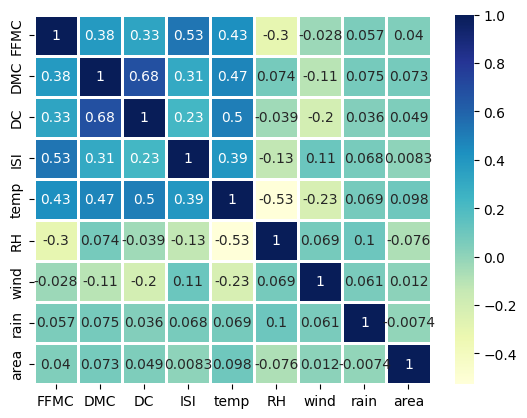

In [138]:
sns.heatmap(ffire.corr(), cmap = "YlGnBu", linewidth = 1, annot = True)  # annot= True for label the values
plt.show()

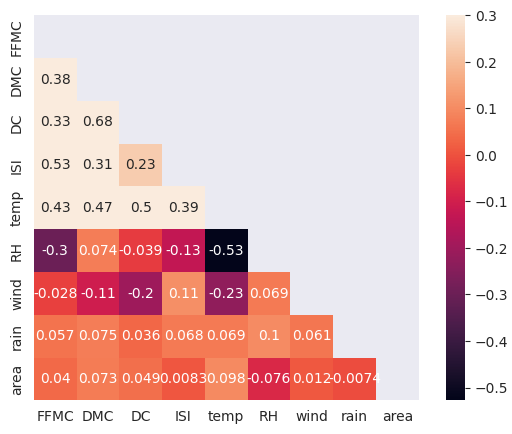

In [139]:
corr = ffire.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):  # Styel must be: white, whitegrid, dark, darkgrid.
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr,mask=mask, vmax=.3, square=True, annot = True)

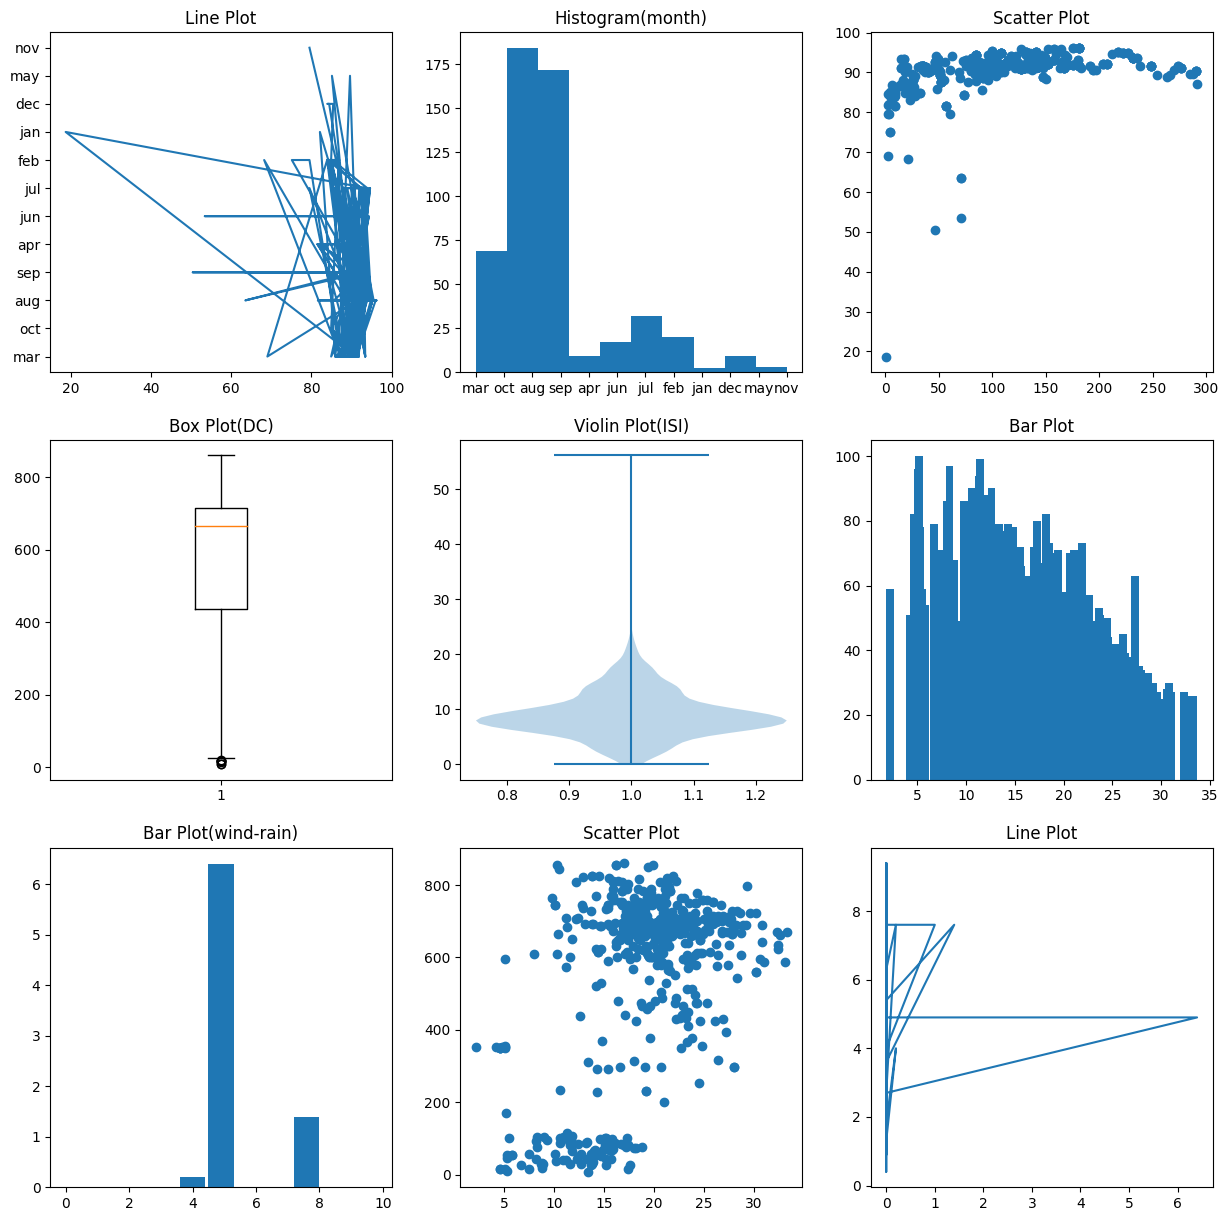

In [140]:
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize =(15,15))
ax[0,0].plot('FFMC','month', data = ffire);ax[0,0].set_title("Line Plot")
ax[0,1].hist('month', data = ffire);ax[0,1].set_title("Histogram(month)")
ax[0,2].scatter('DMC', 'FFMC', data = ffire);ax[0,2].set_title("Scatter Plot")
ax[1,0].boxplot('DC', data = ffire);ax[1,0].set_title("Box Plot(DC)")
ax[1,1].violinplot('ISI', data = ffire);ax[1,1].set_title("Violin Plot(ISI)")
ax[1,2].bar('temp','RH', data = ffire);ax[1,2].set_title("Bar Plot")
ax[2,0].bar(ffire['wind'], ffire["rain"]);ax[2,0].set_title("Bar Plot(wind-rain)")
ax[2,1].scatter('temp','DC', data = ffire);ax[2,1].set_title("Scatter Plot")
ax[2,2].plot('rain','wind', data = ffire);ax[2,2].set_title("Line Plot")
plt.show()

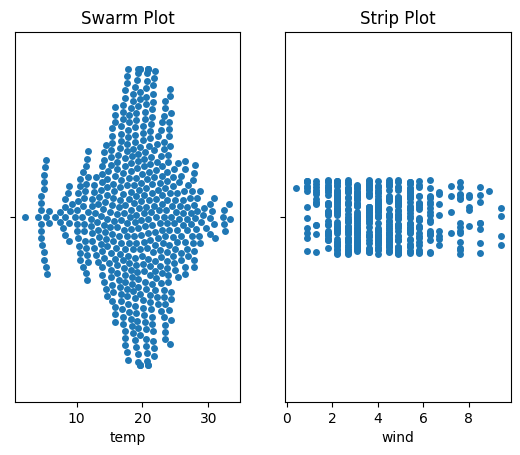

In [141]:
plt.subplot(1,2,1)
sns.swarmplot(x = 'temp', data = ffire);plt.title("Swarm Plot")
plt.subplot(1,2,2)
sns.stripplot( x = 'wind', data = ffire);plt.title("Strip Plot")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12588\673814530.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  [plt.subplot(3,3,1), sns.countplot(data=ffire, y='month')];


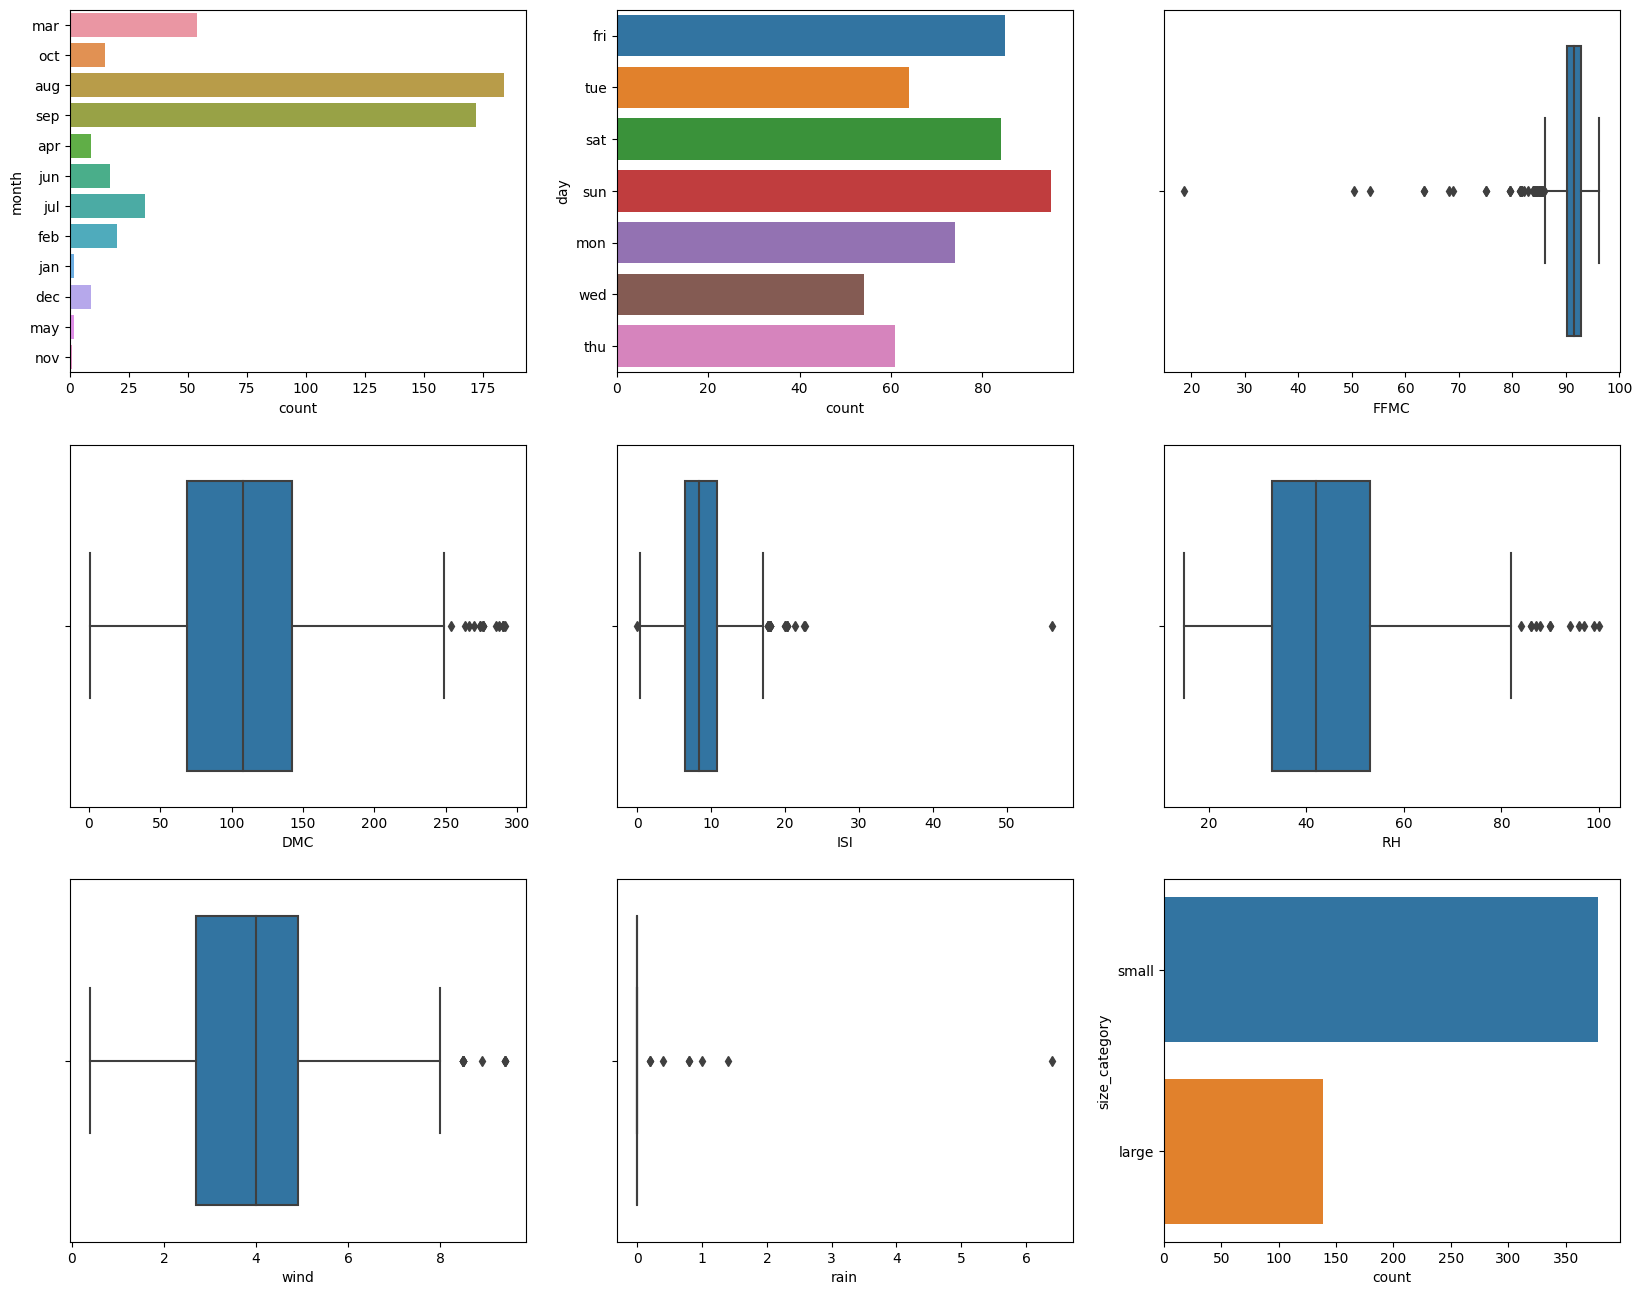

In [142]:
plt.subplots(figsize=(20,16))
[plt.subplot(3,3,1), sns.countplot(data=ffire, y='month')];

[plt.subplot(3,3,2), sns.countplot(data=ffire, y='day')];

[plt.subplot(3,3,3), sns.boxplot(x=ffire["FFMC"])];

[plt.subplot(3,3,4), sns.boxplot(x=ffire["DMC"])];

[plt.subplot(3,3,5), sns.boxplot(x=ffire["ISI"])];

[plt.subplot(3,3,6), sns.boxplot(x=ffire["RH"])];

[plt.subplot(3,3,7), sns.boxplot(x=ffire["wind"])];

[plt.subplot(3,3,8), sns.boxplot(x=ffire["rain"])];

[plt.subplot(3,3,9), sns.countplot(data=ffire, y='size_category')];
plt.show()

C:\Users\ADMIN\anaconda3\envs\Envorinment_Name\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


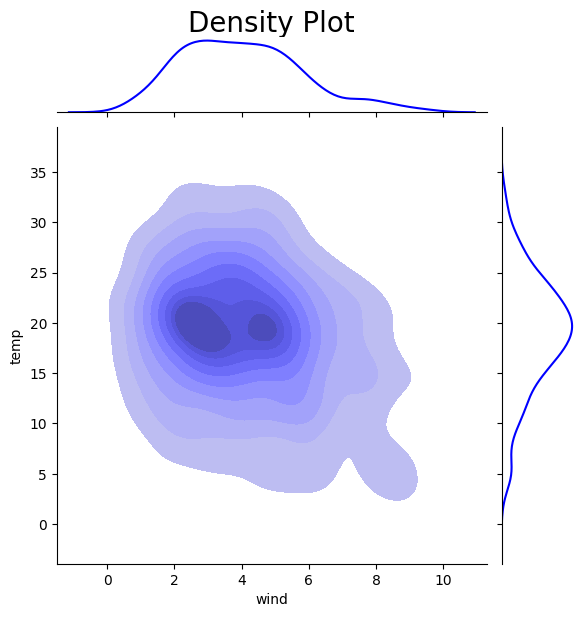

In [143]:
sns.jointplot(x = 'wind', y='temp', data = ffire, kind= 'kde', shade = True, color = 'blue')  # shade = True: filed with color shape
plt.title("Density Plot", size = 20, y= 1.2)
plt.show()

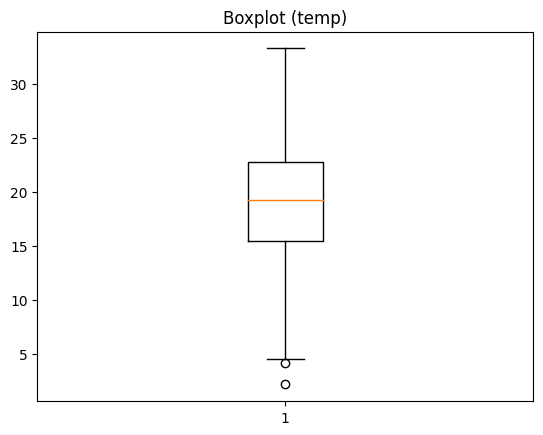

In [144]:
# Boxplot for outlier detection
plt.boxplot(ffire['temp']); plt.title("Boxplot (temp)")
plt.show()

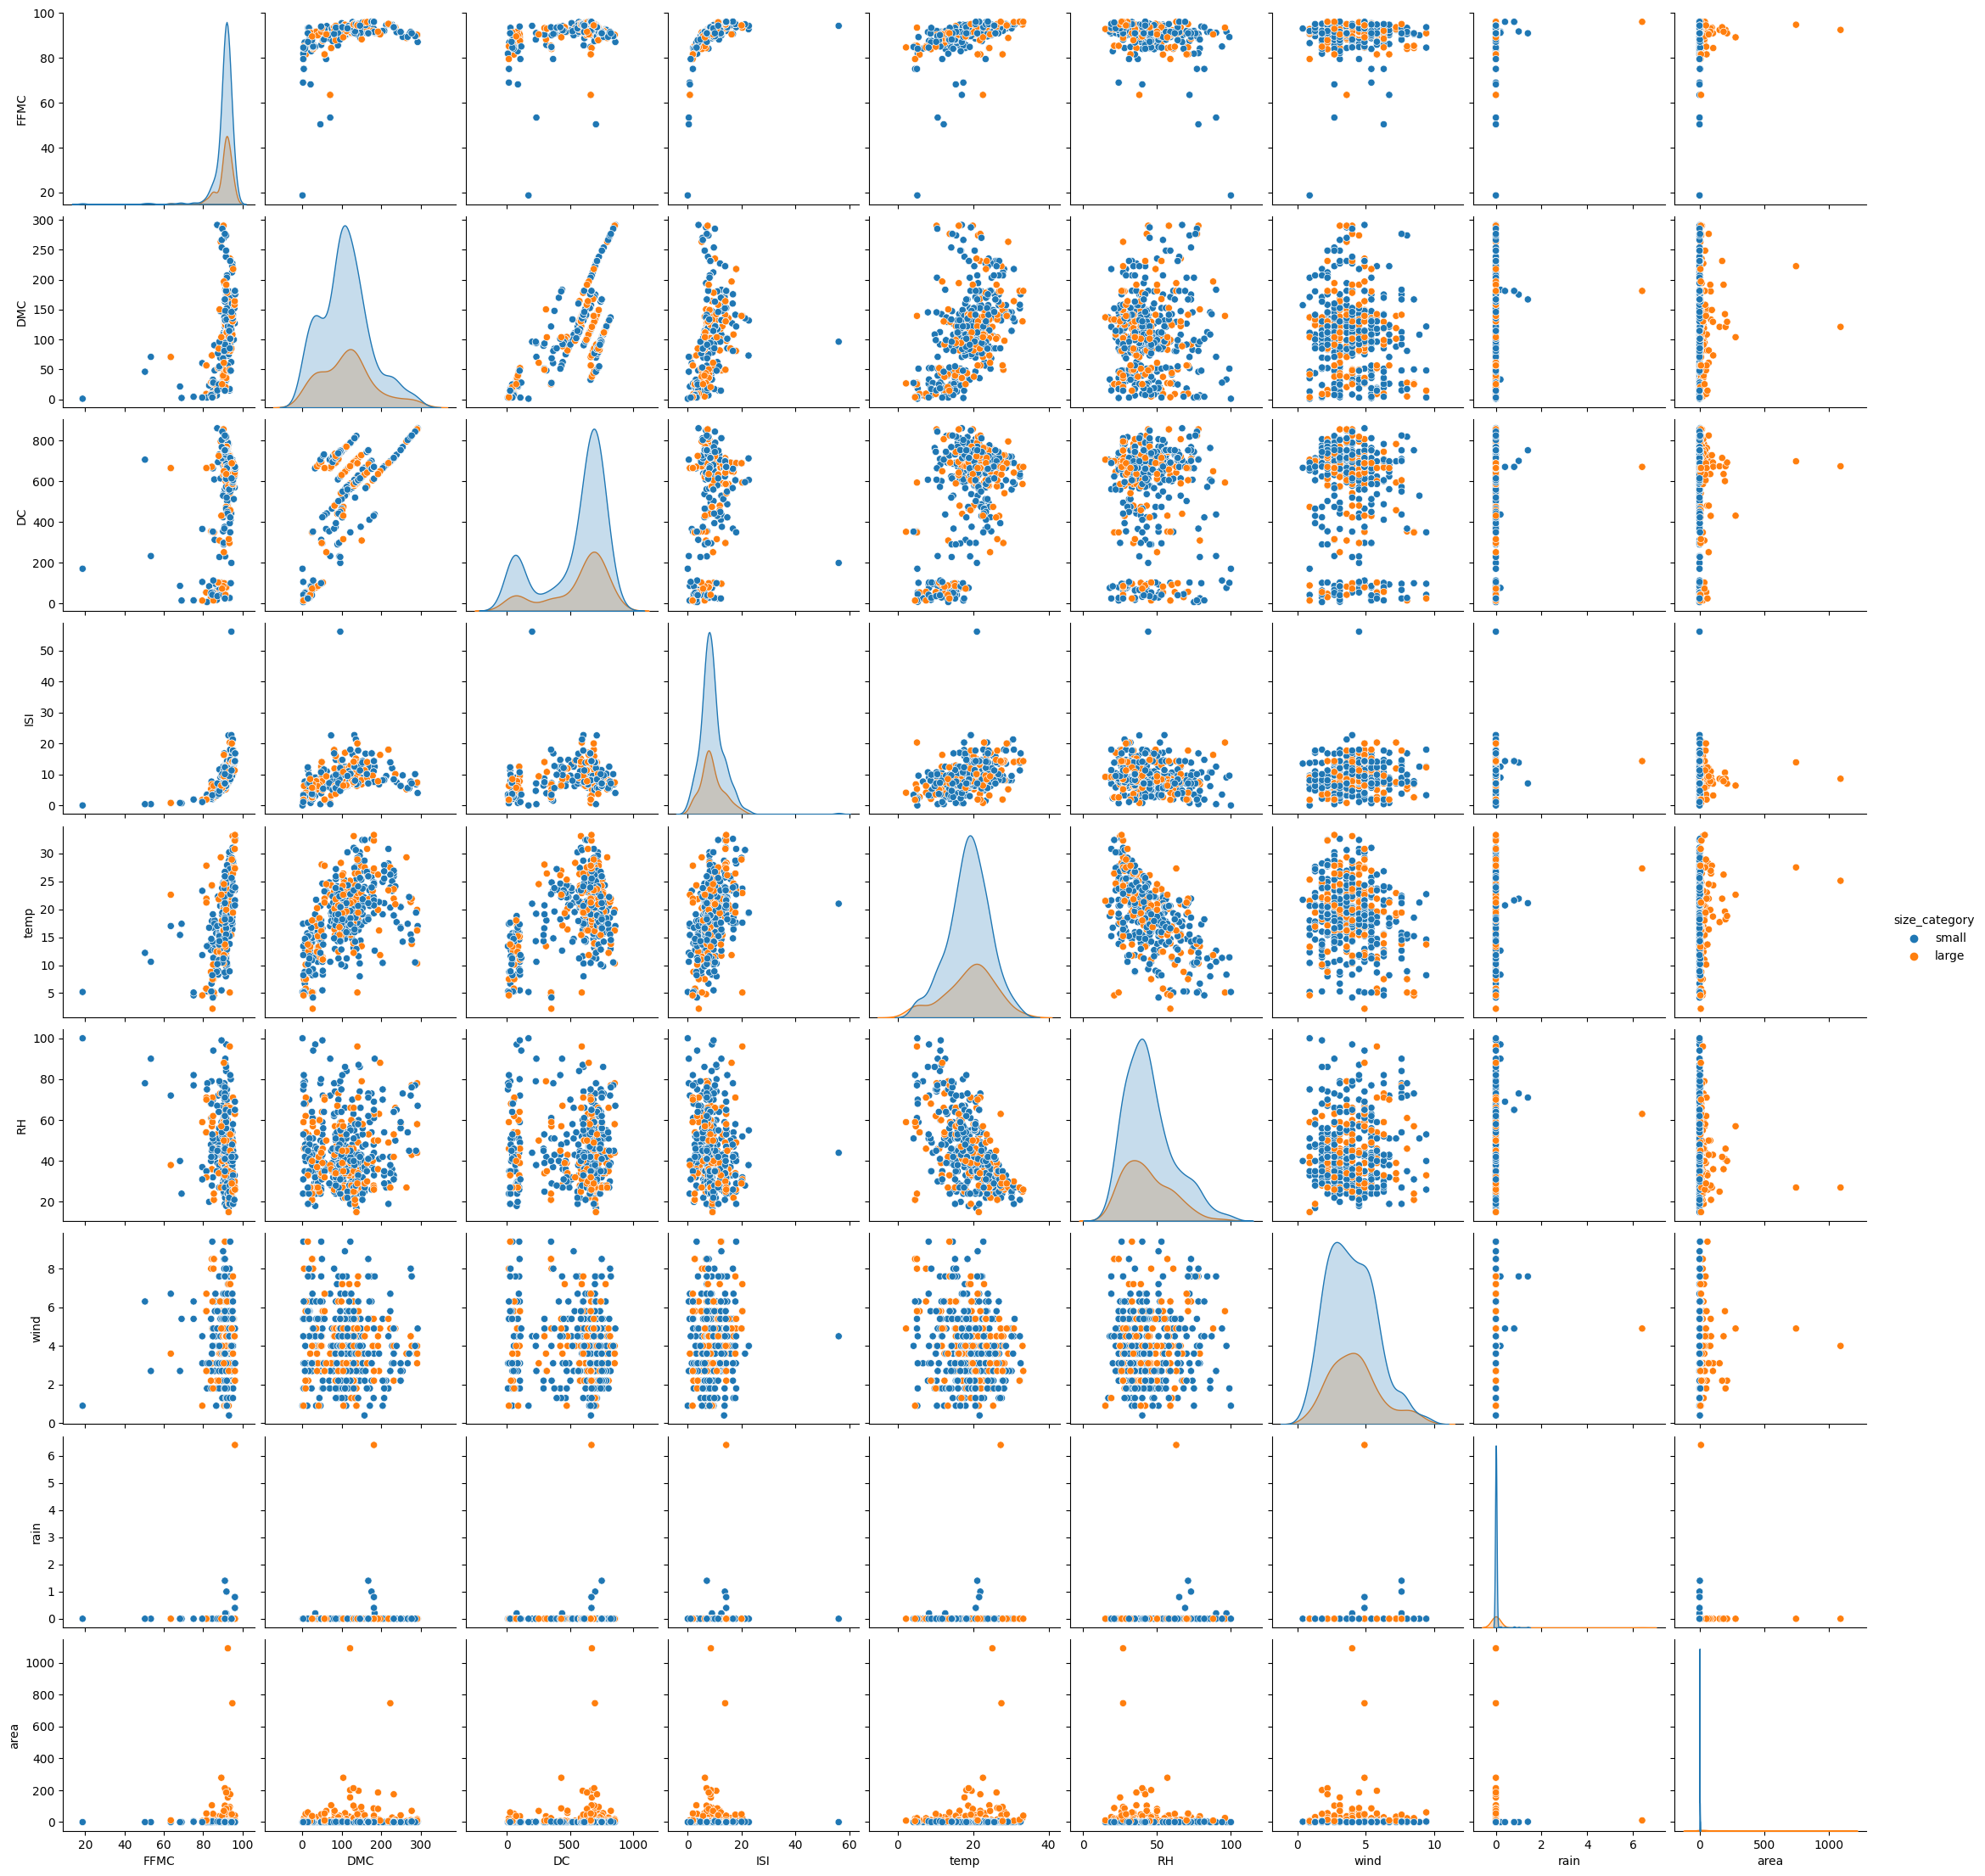

In [145]:
# Plotting pairplot for visualize all the attributes in one plot
sns.pairplot(ffire, hue = 'size_category')
plt.show()

# Neural Network

In [146]:
from keras.models import Sequential
from keras.layers import Dense, LSTM    # we can use LSTM instead if Dense
from sklearn import preprocessing  

In [147]:
# Convert all the categorical variables to numeric
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
ffire['month'] = LE.fit_transform(ffire['month'])
ffire['day'] = LE.fit_transform(ffire['day'])
ffire['size_category'] = LE.fit_transform(ffire['size_category'])

In [148]:
X = ffire.iloc[:,2:-1]
Y = ffire.iloc[:,-1]
print(Y)
X

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [149]:
# Architecture
model = Sequential()
model.add(Dense(12, input_dim = 9, activation = "relu", name = 'input_layer_Dense'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = "sigmoid"))

In [150]:
# Compile Model

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model

In [151]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_Dense (Dense)   (None, 12)                120       
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [152]:
# Fit the model
fit_model = model.fit(X, Y, validation_split = 0.33 , epochs = 250, batch_size = 10)

Epoch 1/250
35/35 [==============================] - 1s 6ms/step - loss: 1.8691 - accuracy: 0.7254 - val_loss: 4.2045 - val_accuracy: 0.6842
Epoch 2/250
35/35 [==============================] - 0s 2ms/step - loss: 1.5583 - accuracy: 0.7659 - val_loss: 3.1562 - val_accuracy: 0.7076
Epoch 3/250
35/35 [==============================] - 0s 3ms/step - loss: 1.2644 - accuracy: 0.7746 - val_loss: 2.7591 - val_accuracy: 0.7661
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 1.0195 - accuracy: 0.7601 - val_loss: 2.1897 - val_accuracy: 0.7836
Epoch 5/250
35/35 [==============================] - 0s 2ms/step - loss: 0.8286 - accuracy: 0.8006 - val_loss: 2.3423 - val_accuracy: 0.7719
Epoch 6/250
35/35 [==============================] - 0s 3ms/step - loss: 0.7274 - accuracy: 0.8208 - val_loss: 1.2346 - val_accuracy: 0.8012
Epoch 7/250
35/35 [==============================] - 0s 2ms/step - loss: 0.5700 - accuracy: 0.8179 - val_loss: 0.9507 - val_accuracy: 0.7953
Epoch 8/250
3

Epoch 59/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0916 - accuracy: 0.9595 - val_loss: 0.4679 - val_accuracy: 0.8655
Epoch 60/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 0.9480 - val_loss: 0.1173 - val_accuracy: 0.9532
Epoch 61/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1572 - accuracy: 0.9595 - val_loss: 0.1610 - val_accuracy: 0.9123
Epoch 62/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0344 - accuracy: 0.9855 - val_loss: 0.1243 - val_accuracy: 0.9357
Epoch 63/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9942 - val_loss: 0.1167 - val_accuracy: 0.9532
Epoch 64/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0520 - accuracy: 0.9798 - val_loss: 0.1153 - val_accuracy: 0.9591
Epoch 65/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9855 - val_loss: 0.1308 - val_accuracy: 0.9357
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9884 - val_loss: 0.1092 - val_accuracy: 0.9591
Epoch 117/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9884 - val_loss: 0.1118 - val_accuracy: 0.9591
Epoch 118/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9884 - val_loss: 0.2062 - val_accuracy: 0.9298
Epoch 119/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9798 - val_loss: 0.3040 - val_accuracy: 0.9240
Epoch 120/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9913 - val_loss: 0.1370 - val_accuracy: 0.9474
Epoch 121/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9827 - val_loss: 0.1034 - val_accuracy: 0.9649
Epoch 122/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9884 - val_loss: 0.1151 - val_accuracy: 0.9591
Epoch 123/250

35/35 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 0.9942 - val_loss: 0.1189 - val_accuracy: 0.9532
Epoch 174/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9855 - val_loss: 0.1379 - val_accuracy: 0.9415
Epoch 175/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9913 - val_loss: 0.1235 - val_accuracy: 0.9532
Epoch 176/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9913 - val_loss: 0.1254 - val_accuracy: 0.9415
Epoch 177/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9942 - val_loss: 0.1174 - val_accuracy: 0.9591
Epoch 178/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0682 - accuracy: 0.9769 - val_loss: 0.1177 - val_accuracy: 0.9532
Epoch 179/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.1177 - val_accuracy: 0.9532
Epoch 180/250

35/35 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9913 - val_loss: 0.2345 - val_accuracy: 0.9357
Epoch 231/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9942 - val_loss: 0.1128 - val_accuracy: 0.9591
Epoch 232/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9798 - val_loss: 0.3947 - val_accuracy: 0.9240
Epoch 233/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9855 - val_loss: 0.2718 - val_accuracy: 0.9357
Epoch 234/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9740 - val_loss: 0.3043 - val_accuracy: 0.9181
Epoch 235/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9740 - val_loss: 0.1545 - val_accuracy: 0.9591
Epoch 236/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.1451 - val_accuracy: 0.9591
Epoch 237/250

In [153]:
# Fit the model
fit_model = model.fit(X, Y, validation_split = 0.33 , epochs = 250, batch_size = 10)

Epoch 1/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.9942 - val_loss: 0.1130 - val_accuracy: 0.9649
Epoch 2/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.9769 - val_loss: 0.1459 - val_accuracy: 0.9532
Epoch 3/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.1355 - val_accuracy: 0.9532
Epoch 4/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9913 - val_loss: 0.1353 - val_accuracy: 0.9708
Epoch 5/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.1157 - val_accuracy: 0.9591
Epoch 6/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9913 - val_loss: 0.1903 - val_accuracy: 0.9591
Epoch 7/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9942 - val_loss: 0.1392 - val_accuracy: 0.9591
Epoch 8/250
3

Epoch 59/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9913 - val_loss: 0.1440 - val_accuracy: 0.9708
Epoch 60/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 0.9591
Epoch 61/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9942 - val_loss: 0.1726 - val_accuracy: 0.9591
Epoch 62/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9855 - val_loss: 0.1191 - val_accuracy: 0.9708
Epoch 63/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9913 - val_loss: 0.1265 - val_accuracy: 0.9649
Epoch 64/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.1681 - val_accuracy: 0.9474
Epoch 65/250
35/35 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9740 - val_loss: 0.3105 - val_accuracy: 0.9298
Epoch 

35/35 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9971 - val_loss: 0.1710 - val_accuracy: 0.9532
Epoch 117/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9827 - val_loss: 0.1956 - val_accuracy: 0.9591
Epoch 118/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9798 - val_loss: 0.8155 - val_accuracy: 0.8947
Epoch 119/250
35/35 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.9480 - val_loss: 0.5839 - val_accuracy: 0.9064
Epoch 120/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9798 - val_loss: 0.1507 - val_accuracy: 0.9532
Epoch 121/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9884 - val_loss: 0.1590 - val_accuracy: 0.9591
Epoch 122/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.1540 - val_accuracy: 0.9474
Epoch 123/250

35/35 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9942 - val_loss: 0.1302 - val_accuracy: 0.9532
Epoch 174/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9942 - val_loss: 0.1879 - val_accuracy: 0.9649
Epoch 175/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9942 - val_loss: 0.1181 - val_accuracy: 0.9708
Epoch 176/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9884 - val_loss: 0.1647 - val_accuracy: 0.9474
Epoch 177/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0179 - accuracy: 0.9913 - val_loss: 0.1172 - val_accuracy: 0.9708
Epoch 178/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9913 - val_loss: 0.2435 - val_accuracy: 0.9415
Epoch 179/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9913 - val_loss: 0.1382 - val_accuracy: 0.9708
Epoch 180/250

35/35 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9913 - val_loss: 0.1710 - val_accuracy: 0.9532
Epoch 231/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0195 - accuracy: 0.9913 - val_loss: 0.1506 - val_accuracy: 0.9591
Epoch 232/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.1279 - val_accuracy: 0.9708
Epoch 233/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.1394 - val_accuracy: 0.9591
Epoch 234/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9884 - val_loss: 0.1746 - val_accuracy: 0.9532
Epoch 235/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9827 - val_loss: 0.3688 - val_accuracy: 0.9357
Epoch 236/250
35/35 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9740 - val_loss: 0.1478 - val_accuracy: 0.9708
Epoch 237/250

In [154]:
# Evaluating the Model
score1 = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], score1[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.0523 - accuracy: 0.9807
accuracy: 98.07%


In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
# Visualzation of Training History
fit_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
fit_model.history['accuracy']

[0.9884393215179443,
 0.9797688126564026,
 0.9826589822769165,
 0.9768785834312439,
 0.97398841381073,
 0.9855491518974304,
 0.9971098303794861,
 0.9942196607589722,
 0.9942196607589722,
 0.9913294911384583,
 0.9884393215179443,
 0.9971098303794861,
 0.9971098303794861,
 0.9942196607589722,
 0.9942196607589722,
 0.9971098303794861,
 0.9913294911384583,
 0.9913294911384583,
 0.9942196607589722,
 0.9971098303794861,
 0.9942196607589722,
 0.9971098303794861,
 0.9942196607589722,
 0.9913294911384583,
 0.9884393215179443,
 0.9913294911384583,
 0.97398841381073,
 0.97398841381073,
 0.9942196607589722,
 0.9971098303794861,
 0.9884393215179443,
 0.9913294911384583,
 0.9942196607589722,
 0.9971098303794861,
 0.9884393215179443,
 0.9884393215179443,
 0.9913294911384583,
 0.9942196607589722,
 1.0,
 0.9826589822769165,
 0.9913294911384583,
 0.9595375657081604,
 0.9855491518974304,
 0.9942196607589722,
 0.9913294911384583,
 0.9942196607589722,
 0.9971098303794861,
 0.9971098303794861,
 0.9826589822

In [38]:
fit_model.history['val_accuracy']

[0.9473684430122375,
 0.9356725215911865,
 0.9356725215911865,
 0.9239766001701355,
 0.9298245906829834,
 0.9356725215911865,
 0.9415204524993896,
 0.9415204524993896,
 0.9473684430122375,
 0.9415204524993896,
 0.9298245906829834,
 0.9298245906829834,
 0.9356725215911865,
 0.9298245906829834,
 0.9356725215911865,
 0.9356725215911865,
 0.9415204524993896,
 0.9298245906829834,
 0.9415204524993896,
 0.9473684430122375,
 0.9415204524993896,
 0.9298245906829834,
 0.9356725215911865,
 0.9415204524993896,
 0.9415204524993896,
 0.9415204524993896,
 0.9005848169326782,
 0.9239766001701355,
 0.9415204524993896,
 0.9356725215911865,
 0.9415204524993896,
 0.9298245906829834,
 0.9473684430122375,
 0.9356725215911865,
 0.9356725215911865,
 0.9356725215911865,
 0.9356725215911865,
 0.9356725215911865,
 0.9356725215911865,
 0.9356725215911865,
 0.9356725215911865,
 0.9356725215911865,
 0.9415204524993896,
 0.9356725215911865,
 0.9298245906829834,
 0.9356725215911865,
 0.9298245906829834,
 0.9239766001

In [39]:
fit_model.history['loss'] 

[0.030854662880301476,
 0.04668448492884636,
 0.0255874190479517,
 0.04335234314203262,
 0.05947349593043327,
 0.04680267348885536,
 0.013846305198967457,
 0.017887670546770096,
 0.013316180557012558,
 0.019353900104761124,
 0.022777780890464783,
 0.015399605967104435,
 0.018104152753949165,
 0.024725016206502914,
 0.01794392056763172,
 0.017282966524362564,
 0.017488347366452217,
 0.0158808846026659,
 0.025283273309469223,
 0.013483935035765171,
 0.016044463962316513,
 0.013976376503705978,
 0.01678437367081642,
 0.020675163716077805,
 0.018343621864914894,
 0.02594238705933094,
 0.053878266364336014,
 0.08102858066558838,
 0.02508554607629776,
 0.01225571520626545,
 0.02521040290594101,
 0.023173922672867775,
 0.021231556311249733,
 0.009649907238781452,
 0.02394941635429859,
 0.029012363404035568,
 0.014820156618952751,
 0.01475771889090538,
 0.011420773342251778,
 0.03147527948021889,
 0.014251208864152431,
 0.12270134687423706,
 0.04380679130554199,
 0.015344148501753807,
 0.01934

In [40]:
fit_model.history['val_loss']

[0.1760416477918625,
 0.3212634027004242,
 0.2547149956226349,
 0.42004257440567017,
 0.3963703215122223,
 0.27222928404808044,
 0.26110249757766724,
 0.247711643576622,
 0.22851720452308655,
 0.24834036827087402,
 0.37356120347976685,
 0.32058390974998474,
 0.35995912551879883,
 0.38932591676712036,
 0.34405970573425293,
 0.3411681652069092,
 0.296176940202713,
 0.326377272605896,
 0.24802155792713165,
 0.2341768592596054,
 0.26214638352394104,
 0.36598509550094604,
 0.36282089352607727,
 0.2884923219680786,
 0.2801291346549988,
 0.2501068115234375,
 0.8552558422088623,
 0.515895426273346,
 0.2812387943267822,
 0.30833500623703003,
 0.24211928248405457,
 0.30719032883644104,
 0.26486462354660034,
 0.2447345107793808,
 0.24064959585666656,
 0.3165833652019501,
 0.32879745960235596,
 0.31601980328559875,
 0.42726200819015503,
 0.37591123580932617,
 0.25346294045448303,
 0.4412692189216614,
 0.43814241886138916,
 0.42318761348724365,
 0.4697403013706207,
 0.3355559706687927,
 0.409222483

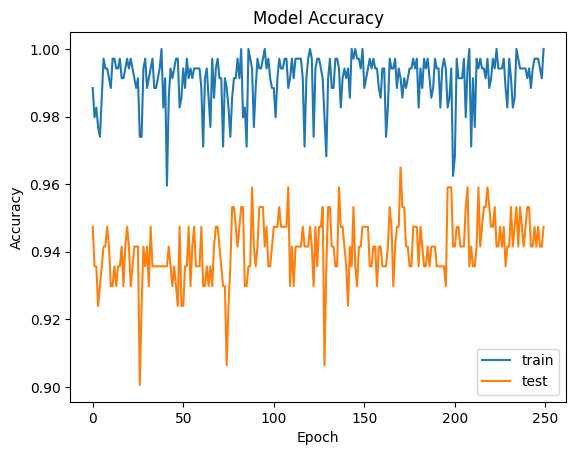

In [41]:
 # summarizaion of history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

As per graphs, Accuracy on train and test both are almost parallel to each other.

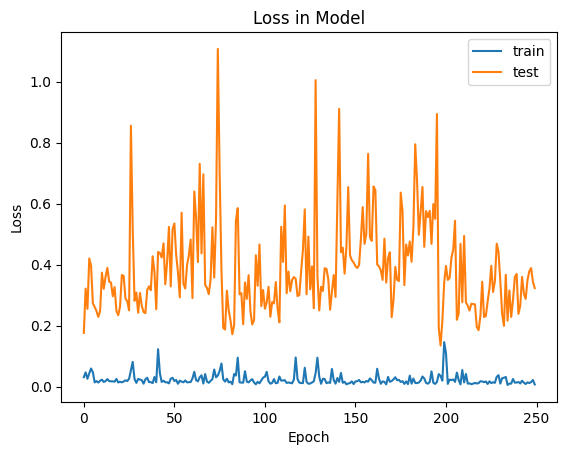

In [42]:
# # summarization of history for 'loss'
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

As per graphs, Loss on train and test both are almost parallel to each other.

In [43]:
predictions = model.predict(X)

17/17 [==============================] - 0s 1ms/step


# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [44]:
# fix random seed for reproducibility
seed2 = 9
np.random.seed(seed2)

In [45]:
# creating model with ["linear" and "sigmoid"]

model2 = Sequential() # 0 level
model2.add(Dense(14, input_dim=9,  activation='linear')) #1st layer
model2.add(Dense(9,  activation='linear')) #2nd layer
model2.add(Dense(1, activation='sigmoid')) #3rd layer or op layer

In [46]:
# Compile model
# chaging optimizer older=ada, new=adadelta

model2.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])


In [47]:
# Fit the model
# Change ephocs from 250 to 200

fit_model2=model2.fit(X,Y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
35/35 [==============================] - 1s 5ms/step - loss: 34.0162 - accuracy: 0.2717 - val_loss: 44.5898 - val_accuracy: 0.3626
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 33.6905 - accuracy: 0.2717 - val_loss: 44.2483 - val_accuracy: 0.3626
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 33.3545 - accuracy: 0.2717 - val_loss: 43.9023 - val_accuracy: 0.3626
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 33.0145 - accuracy: 0.2717 - val_loss: 43.5499 - val_accuracy: 0.3626
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 32.6690 - accuracy: 0.2717 - val_loss: 43.1897 - val_accuracy: 0.3626
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 32.3145 - accuracy: 0.2746 - val_loss: 42.8182 - val_accuracy: 0.3626
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 31.9503 - accuracy: 0.2746 - val_loss: 42.4416 - val_accuracy: 0.3626

Epoch 58/200
35/35 [==============================] - 0s 2ms/step - loss: 11.8502 - accuracy: 0.3121 - val_loss: 21.0100 - val_accuracy: 0.3801
Epoch 59/200
35/35 [==============================] - 0s 2ms/step - loss: 11.5722 - accuracy: 0.3150 - val_loss: 20.6858 - val_accuracy: 0.3684
Epoch 60/200
35/35 [==============================] - 0s 2ms/step - loss: 11.3012 - accuracy: 0.3266 - val_loss: 20.3695 - val_accuracy: 0.3743
Epoch 61/200
35/35 [==============================] - 0s 2ms/step - loss: 11.0399 - accuracy: 0.3353 - val_loss: 20.0654 - val_accuracy: 0.3743
Epoch 62/200
35/35 [==============================] - 0s 2ms/step - loss: 10.7900 - accuracy: 0.3382 - val_loss: 19.7683 - val_accuracy: 0.3801
Epoch 63/200
35/35 [==============================] - 0s 2ms/step - loss: 10.5502 - accuracy: 0.3468 - val_loss: 19.4827 - val_accuracy: 0.3918
Epoch 64/200
35/35 [==============================] - 0s 2ms/step - loss: 10.3225 - accuracy: 0.3555 - val_loss: 19.2110 - val_accuracy:

35/35 [==============================] - 0s 3ms/step - loss: 5.9783 - accuracy: 0.5462 - val_loss: 12.4922 - val_accuracy: 0.4269
Epoch 116/200
35/35 [==============================] - 0s 2ms/step - loss: 5.9691 - accuracy: 0.5462 - val_loss: 12.4531 - val_accuracy: 0.4269
Epoch 117/200
35/35 [==============================] - 0s 2ms/step - loss: 5.9605 - accuracy: 0.5434 - val_loss: 12.4109 - val_accuracy: 0.4269
Epoch 118/200
35/35 [==============================] - 0s 2ms/step - loss: 5.9521 - accuracy: 0.5462 - val_loss: 12.3725 - val_accuracy: 0.4269
Epoch 119/200
35/35 [==============================] - 0s 2ms/step - loss: 5.9446 - accuracy: 0.5491 - val_loss: 12.3356 - val_accuracy: 0.4269
Epoch 120/200
35/35 [==============================] - 0s 2ms/step - loss: 5.9376 - accuracy: 0.5520 - val_loss: 12.3007 - val_accuracy: 0.4211
Epoch 121/200
35/35 [==============================] - 0s 2ms/step - loss: 5.9316 - accuracy: 0.5578 - val_loss: 12.2658 - val_accuracy: 0.4211
Epoch 

Epoch 172/200
35/35 [==============================] - 0s 2ms/step - loss: 5.8017 - accuracy: 0.5780 - val_loss: 11.5166 - val_accuracy: 0.4269
Epoch 173/200
35/35 [==============================] - 0s 2ms/step - loss: 5.8004 - accuracy: 0.5780 - val_loss: 11.5109 - val_accuracy: 0.4269
Epoch 174/200
35/35 [==============================] - 0s 2ms/step - loss: 5.7989 - accuracy: 0.5780 - val_loss: 11.5018 - val_accuracy: 0.4269
Epoch 175/200
35/35 [==============================] - 0s 2ms/step - loss: 5.7972 - accuracy: 0.5780 - val_loss: 11.4983 - val_accuracy: 0.4269
Epoch 176/200
35/35 [==============================] - 0s 2ms/step - loss: 5.7956 - accuracy: 0.5780 - val_loss: 11.4946 - val_accuracy: 0.4269
Epoch 177/200
35/35 [==============================] - 0s 2ms/step - loss: 5.7941 - accuracy: 0.5780 - val_loss: 11.4858 - val_accuracy: 0.4269
Epoch 178/200
35/35 [==============================] - 0s 2ms/step - loss: 5.7924 - accuracy: 0.5780 - val_loss: 11.4824 - val_accuracy:

In [48]:
# Evaluating the Model

score2 = model2.evaluate(X,Y)
print("%s: %.2f%%" % (model2.metrics_names[1], score2[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 7.6189 - accuracy: 0.5280
accuracy: 52.80%


In [49]:
# Visualzation of Training History, metric name and score

model2.metrics_names, score2 , fit_model2.history.keys()

(['loss', 'accuracy'],
 [7.618899822235107, 0.5280464291572571],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

In [50]:
fit_model2.history['accuracy'] 

[0.27167630195617676,
 0.27167630195617676,
 0.27167630195617676,
 0.27167630195617676,
 0.27167630195617676,
 0.2745664715766907,
 0.2745664715766907,
 0.2745664715766907,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2803468108177185,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2774566411972046,
 0.2832369804382324,
 0.2774566411972046,
 0.2803468108177185,
 0.2803468108177185,
 0.2803468108177185,
 0.2832369804382324,
 0.2832369804382324,
 0.2861271798610687,
 0.2803468108177185,
 0.2803468108177185,
 0.2832369804382324,
 0.28901734948158264,
 0.2947976887226105,
 0.28901734948158264,
 0.2832369804382324,
 0.2803468108177185,
 0.2832369804382324,
 0.2832369804382324,
 0.2861271798610687,
 0.29190751910209656,
 0.2976878583431244,
 0.29

In [51]:
fit_model2.history['val_accuracy']

[0.3625730872154236,
 0.3625730872154236,
 0.3625730872154236,
 0.3625730872154236,
 0.3625730872154236,
 0.3625730872154236,
 0.3625730872154236,
 0.35672515630722046,
 0.35672515630722046,
 0.35672515630722046,
 0.35672515630722046,
 0.35672515630722046,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.34502923488616943,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35087719559669495,
 0.35672515630722046,
 0.35672515630722046,
 0.35672515630722046,
 0.35672515630722046,
 0.35672515630722046,
 0.35672515630722046,
 0.35672515630722046,
 0.3625730872154236,
 0.3684210479259491,
 0.3684210479259491,
 0.3742690086364746,
 0.3742690086364746,


In [52]:
fit_model2.history['loss'] 

[34.01622772216797,
 33.69046401977539,
 33.354496002197266,
 33.01451873779297,
 32.668968200683594,
 32.31452560424805,
 31.950294494628906,
 31.581314086914062,
 31.20930290222168,
 30.832990646362305,
 30.451711654663086,
 30.065628051757812,
 29.675193786621094,
 29.27712631225586,
 28.876298904418945,
 28.472408294677734,
 28.062023162841797,
 27.65038299560547,
 27.23660659790039,
 26.81920051574707,
 26.397491455078125,
 25.976423263549805,
 25.549802780151367,
 25.12083625793457,
 24.691192626953125,
 24.2583065032959,
 23.821794509887695,
 23.384057998657227,
 22.950916290283203,
 22.51998519897461,
 22.087814331054688,
 21.654687881469727,
 21.22251319885254,
 20.78976058959961,
 20.359342575073242,
 19.928245544433594,
 19.50177764892578,
 19.077667236328125,
 18.66164207458496,
 18.25295066833496,
 17.84731101989746,
 17.44841766357422,
 17.053924560546875,
 16.663469314575195,
 16.278034210205078,
 15.895970344543457,
 15.519336700439453,
 15.146985054016113,
 14.78234767

In [53]:
fit_model2.history['val_loss']

[44.58979797363281,
 44.24832534790039,
 43.902252197265625,
 43.54994583129883,
 43.189697265625,
 42.818199157714844,
 42.44157028198242,
 42.061676025390625,
 41.677242279052734,
 41.28844451904297,
 40.895137786865234,
 40.49601745605469,
 40.09025192260742,
 39.681190490722656,
 39.269222259521484,
 38.84955978393555,
 38.42856979370117,
 38.00444412231445,
 37.576416015625,
 37.14323806762695,
 36.710205078125,
 36.27408218383789,
 35.832374572753906,
 35.391239166259766,
 34.94552230834961,
 34.49675750732422,
 34.04450607299805,
 33.59282302856445,
 33.14560317993164,
 32.69633865356445,
 32.245391845703125,
 31.79378890991211,
 31.340517044067383,
 30.88945198059082,
 30.43434715270996,
 29.979888916015625,
 29.52604103088379,
 29.074954986572266,
 28.63116455078125,
 28.18775749206543,
 27.746273040771484,
 27.310598373413086,
 26.876453399658203,
 26.449602127075195,
 26.025182723999023,
 25.60562515258789,
 25.18578338623047,
 24.7699031829834,
 24.36519432067871,
 23.96781

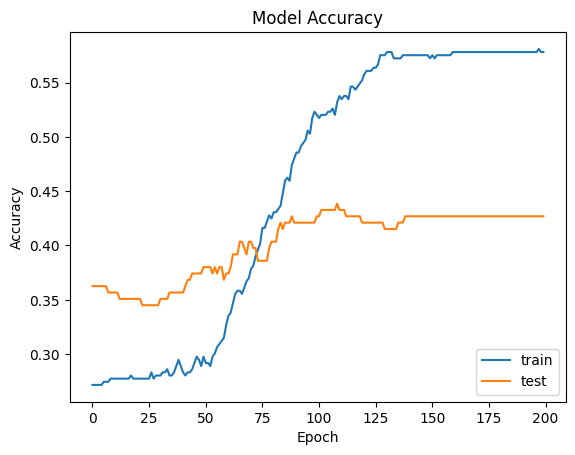

In [54]:
plt.plot(fit_model2.history['accuracy'])
plt.plot(fit_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

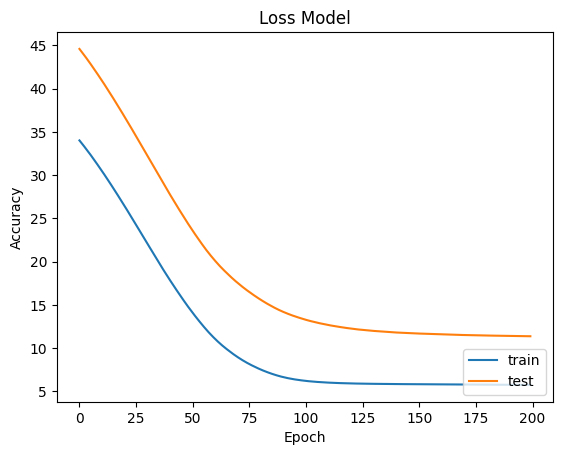

In [55]:
# summarizaion of history for loss
plt.plot(fit_model2.history['loss'])
plt.plot(fit_model2.history['val_loss'])
plt.title('Loss in Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Here in this graphs Test line completely overlap on tha Train line, it's look like similar.

# Making Another model with changing Activation functions and Mini-Batch Gradient(optimizer)

In [56]:
# fix random seed for reproducibility
seed3 = 10
np.random.seed(seed3)

In [57]:
# creating model with ["sigmoid" and "logistic"]
model3 = Sequential() # 0 level
model3.add(Dense(14, input_dim=9,  activation='relu')) # FIRST LAYER
model3.add(Dense(9,  activation='sigmoid')) #2nd layer
model3.add(Dense(1, activation='tanh')) #3rd layer or op layer

In [58]:
# Compile model
# chaging optimizer older=adadelta/ada, new=adagrad
model3.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [59]:
# Fit the model
# Change ephocs
fit_model3=model3.fit(X,Y, validation_split=0.33, epochs=300, batch_size=15)

Epoch 1/300
24/24 [==============================] - 1s 8ms/step - loss: 11.6061 - accuracy: 0.2428 - val_loss: 10.4645 - val_accuracy: 0.3216
Epoch 2/300
24/24 [==============================] - 0s 2ms/step - loss: 11.6041 - accuracy: 0.2428 - val_loss: 10.4647 - val_accuracy: 0.3216
Epoch 3/300
24/24 [==============================] - 0s 3ms/step - loss: 11.6036 - accuracy: 0.2428 - val_loss: 10.4650 - val_accuracy: 0.3216
Epoch 4/300
24/24 [==============================] - 0s 3ms/step - loss: 11.6032 - accuracy: 0.2428 - val_loss: 10.4652 - val_accuracy: 0.3216
Epoch 5/300
24/24 [==============================] - 0s 3ms/step - loss: 11.6030 - accuracy: 0.2428 - val_loss: 10.4653 - val_accuracy: 0.3216
Epoch 6/300
24/24 [==============================] - 0s 2ms/step - loss: 11.6028 - accuracy: 0.2428 - val_loss: 10.4655 - val_accuracy: 0.3216
Epoch 7/300
24/24 [==============================] - 0s 3ms/step - loss: 11.6026 - accuracy: 0.2428 - val_loss: 10.4656 - val_accuracy: 0.3216

Epoch 58/300
24/24 [==============================] - 0s 2ms/step - loss: 11.5253 - accuracy: 0.2428 - val_loss: 10.0852 - val_accuracy: 0.3216
Epoch 59/300
24/24 [==============================] - 0s 3ms/step - loss: 11.5252 - accuracy: 0.2428 - val_loss: 10.0849 - val_accuracy: 0.3216
Epoch 60/300
24/24 [==============================] - 0s 2ms/step - loss: 11.5252 - accuracy: 0.2428 - val_loss: 10.0845 - val_accuracy: 0.3216
Epoch 61/300
24/24 [==============================] - 0s 2ms/step - loss: 11.5251 - accuracy: 0.2428 - val_loss: 10.0842 - val_accuracy: 0.3216
Epoch 62/300
24/24 [==============================] - 0s 2ms/step - loss: 11.5251 - accuracy: 0.2428 - val_loss: 10.0837 - val_accuracy: 0.3216
Epoch 63/300
24/24 [==============================] - 0s 3ms/step - loss: 11.5250 - accuracy: 0.2428 - val_loss: 10.0833 - val_accuracy: 0.3216
Epoch 64/300
24/24 [==============================] - 0s 2ms/step - loss: 11.5249 - accuracy: 0.2428 - val_loss: 10.0830 - val_accuracy:

Epoch 115/300
24/24 [==============================] - 0s 3ms/step - loss: 11.2336 - accuracy: 0.2428 - val_loss: 9.8333 - val_accuracy: 0.3216
Epoch 116/300
24/24 [==============================] - 0s 2ms/step - loss: 11.2314 - accuracy: 0.2428 - val_loss: 9.8327 - val_accuracy: 0.3216
Epoch 117/300
24/24 [==============================] - 0s 3ms/step - loss: 11.2299 - accuracy: 0.2428 - val_loss: 9.8322 - val_accuracy: 0.3216
Epoch 118/300
24/24 [==============================] - 0s 2ms/step - loss: 11.2288 - accuracy: 0.2428 - val_loss: 9.7931 - val_accuracy: 0.3216
Epoch 119/300
24/24 [==============================] - 0s 2ms/step - loss: 11.2277 - accuracy: 0.2428 - val_loss: 9.7792 - val_accuracy: 0.3216
Epoch 120/300
24/24 [==============================] - 0s 3ms/step - loss: 11.2269 - accuracy: 0.2428 - val_loss: 9.7753 - val_accuracy: 0.3216
Epoch 121/300
24/24 [==============================] - 0s 3ms/step - loss: 11.1697 - accuracy: 0.2428 - val_loss: 9.7655 - val_accuracy:

Epoch 172/300
24/24 [==============================] - 0s 2ms/step - loss: 10.2842 - accuracy: 0.2428 - val_loss: 9.7303 - val_accuracy: 0.3216
Epoch 173/300
24/24 [==============================] - 0s 3ms/step - loss: 10.2829 - accuracy: 0.2428 - val_loss: 9.7301 - val_accuracy: 0.3216
Epoch 174/300
24/24 [==============================] - 0s 2ms/step - loss: 10.2818 - accuracy: 0.2428 - val_loss: 9.7300 - val_accuracy: 0.3216
Epoch 175/300
24/24 [==============================] - 0s 3ms/step - loss: 10.2807 - accuracy: 0.2428 - val_loss: 9.7299 - val_accuracy: 0.3216
Epoch 176/300
24/24 [==============================] - 0s 3ms/step - loss: 10.2552 - accuracy: 0.2428 - val_loss: 9.7292 - val_accuracy: 0.3216
Epoch 177/300
24/24 [==============================] - 0s 3ms/step - loss: 10.2426 - accuracy: 0.2428 - val_loss: 9.7291 - val_accuracy: 0.3216
Epoch 178/300
24/24 [==============================] - 0s 2ms/step - loss: 10.2417 - accuracy: 0.2428 - val_loss: 9.7290 - val_accuracy:

Epoch 229/300
24/24 [==============================] - 0s 2ms/step - loss: 10.0966 - accuracy: 0.2428 - val_loss: 9.7245 - val_accuracy: 0.3216
Epoch 230/300
24/24 [==============================] - 0s 2ms/step - loss: 10.0963 - accuracy: 0.2428 - val_loss: 9.7244 - val_accuracy: 0.3216
Epoch 231/300
24/24 [==============================] - 0s 3ms/step - loss: 10.0960 - accuracy: 0.2428 - val_loss: 9.7244 - val_accuracy: 0.3216
Epoch 232/300
24/24 [==============================] - 0s 3ms/step - loss: 10.0957 - accuracy: 0.2428 - val_loss: 9.7243 - val_accuracy: 0.3216
Epoch 233/300
24/24 [==============================] - 0s 2ms/step - loss: 10.0954 - accuracy: 0.2428 - val_loss: 9.7243 - val_accuracy: 0.3216
Epoch 234/300
24/24 [==============================] - 0s 3ms/step - loss: 10.0951 - accuracy: 0.2428 - val_loss: 9.7242 - val_accuracy: 0.3216
Epoch 235/300
24/24 [==============================] - 0s 2ms/step - loss: 10.0948 - accuracy: 0.2428 - val_loss: 9.7242 - val_accuracy:

24/24 [==============================] - 0s 2ms/step - loss: 2.6391 - accuracy: 0.2457 - val_loss: 2.6364 - val_accuracy: 0.3216
Epoch 287/300
24/24 [==============================] - 0s 2ms/step - loss: 2.5858 - accuracy: 0.2457 - val_loss: 2.5523 - val_accuracy: 0.3216
Epoch 288/300
24/24 [==============================] - 0s 2ms/step - loss: 2.5703 - accuracy: 0.2457 - val_loss: 2.5353 - val_accuracy: 0.3216
Epoch 289/300
24/24 [==============================] - 0s 2ms/step - loss: 2.5614 - accuracy: 0.2457 - val_loss: 2.5232 - val_accuracy: 0.3216
Epoch 290/300
24/24 [==============================] - 0s 3ms/step - loss: 2.5543 - accuracy: 0.2457 - val_loss: 2.3981 - val_accuracy: 0.3216
Epoch 291/300
24/24 [==============================] - 0s 2ms/step - loss: 2.5226 - accuracy: 0.2457 - val_loss: 2.3567 - val_accuracy: 0.3216
Epoch 292/300
24/24 [==============================] - 0s 3ms/step - loss: 2.4744 - accuracy: 0.2457 - val_loss: 2.2873 - val_accuracy: 0.3216
Epoch 293/300

In [60]:
# Evaluating the Model
score3 = model3.evaluate(X,Y)
print("%s: %.2f%%" % (model3.metrics_names[1], score3[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 2.1998 - accuracy: 0.2708
accuracy: 27.08%


In [61]:
# Visualzation of Training History, metric name and score
model3.metrics_names, score3 , fit_model3.history.keys()

(['loss', 'accuracy'],
 [2.199821949005127, 0.27079305052757263],
 dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']))

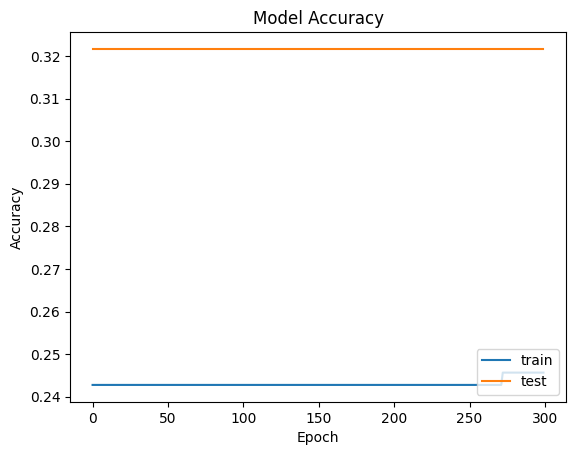

In [62]:
# summarizaion of history for accuracy
plt.plot(fit_model3.history['accuracy'])
plt.plot(fit_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

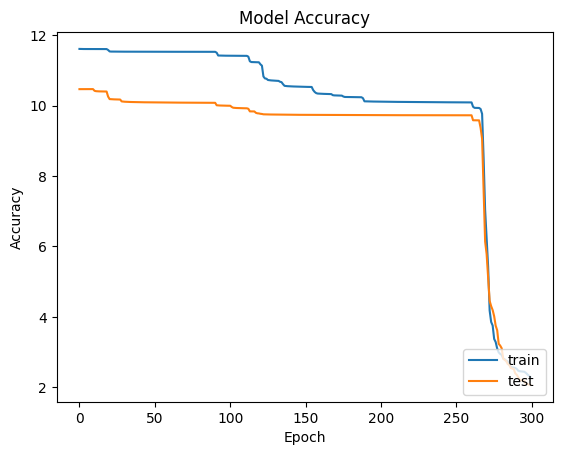

In [63]:
# summarizaion of history for loss
plt.plot(fit_model3.history['loss'])
plt.plot(fit_model3.history['val_loss'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Here in this graphs Test line almost overlap on tha Train line, it's look like similar.

# AS per calcluation "relu" activation function helping to increase accuracy

# ---------------------------------------------------------------------------------------------------------------

# Decision Tree
Model Building , Training and Testing

In [64]:
ffire['size_category'].unique()

array([1, 0])

In [65]:
x = ffire.iloc[:,2:-1]
y = ffire.iloc[:,-1]
print(y)
x

     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..    ...    ...    ...   ...   ...  ..   ...   ...    ...
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 9 columns]
0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32


In [66]:
# Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

# Building Decision Tree Classifier Using Entropy Criteria

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

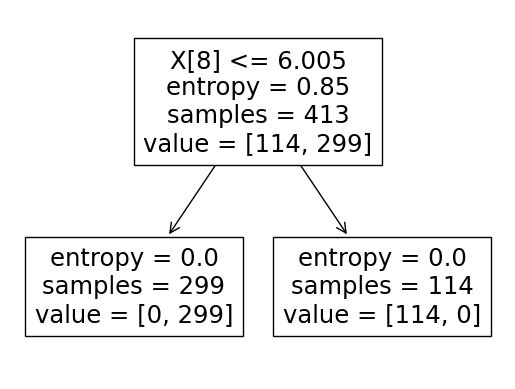

In [68]:
#Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [69]:
y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [70]:
ffire.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

In [71]:
ffire['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

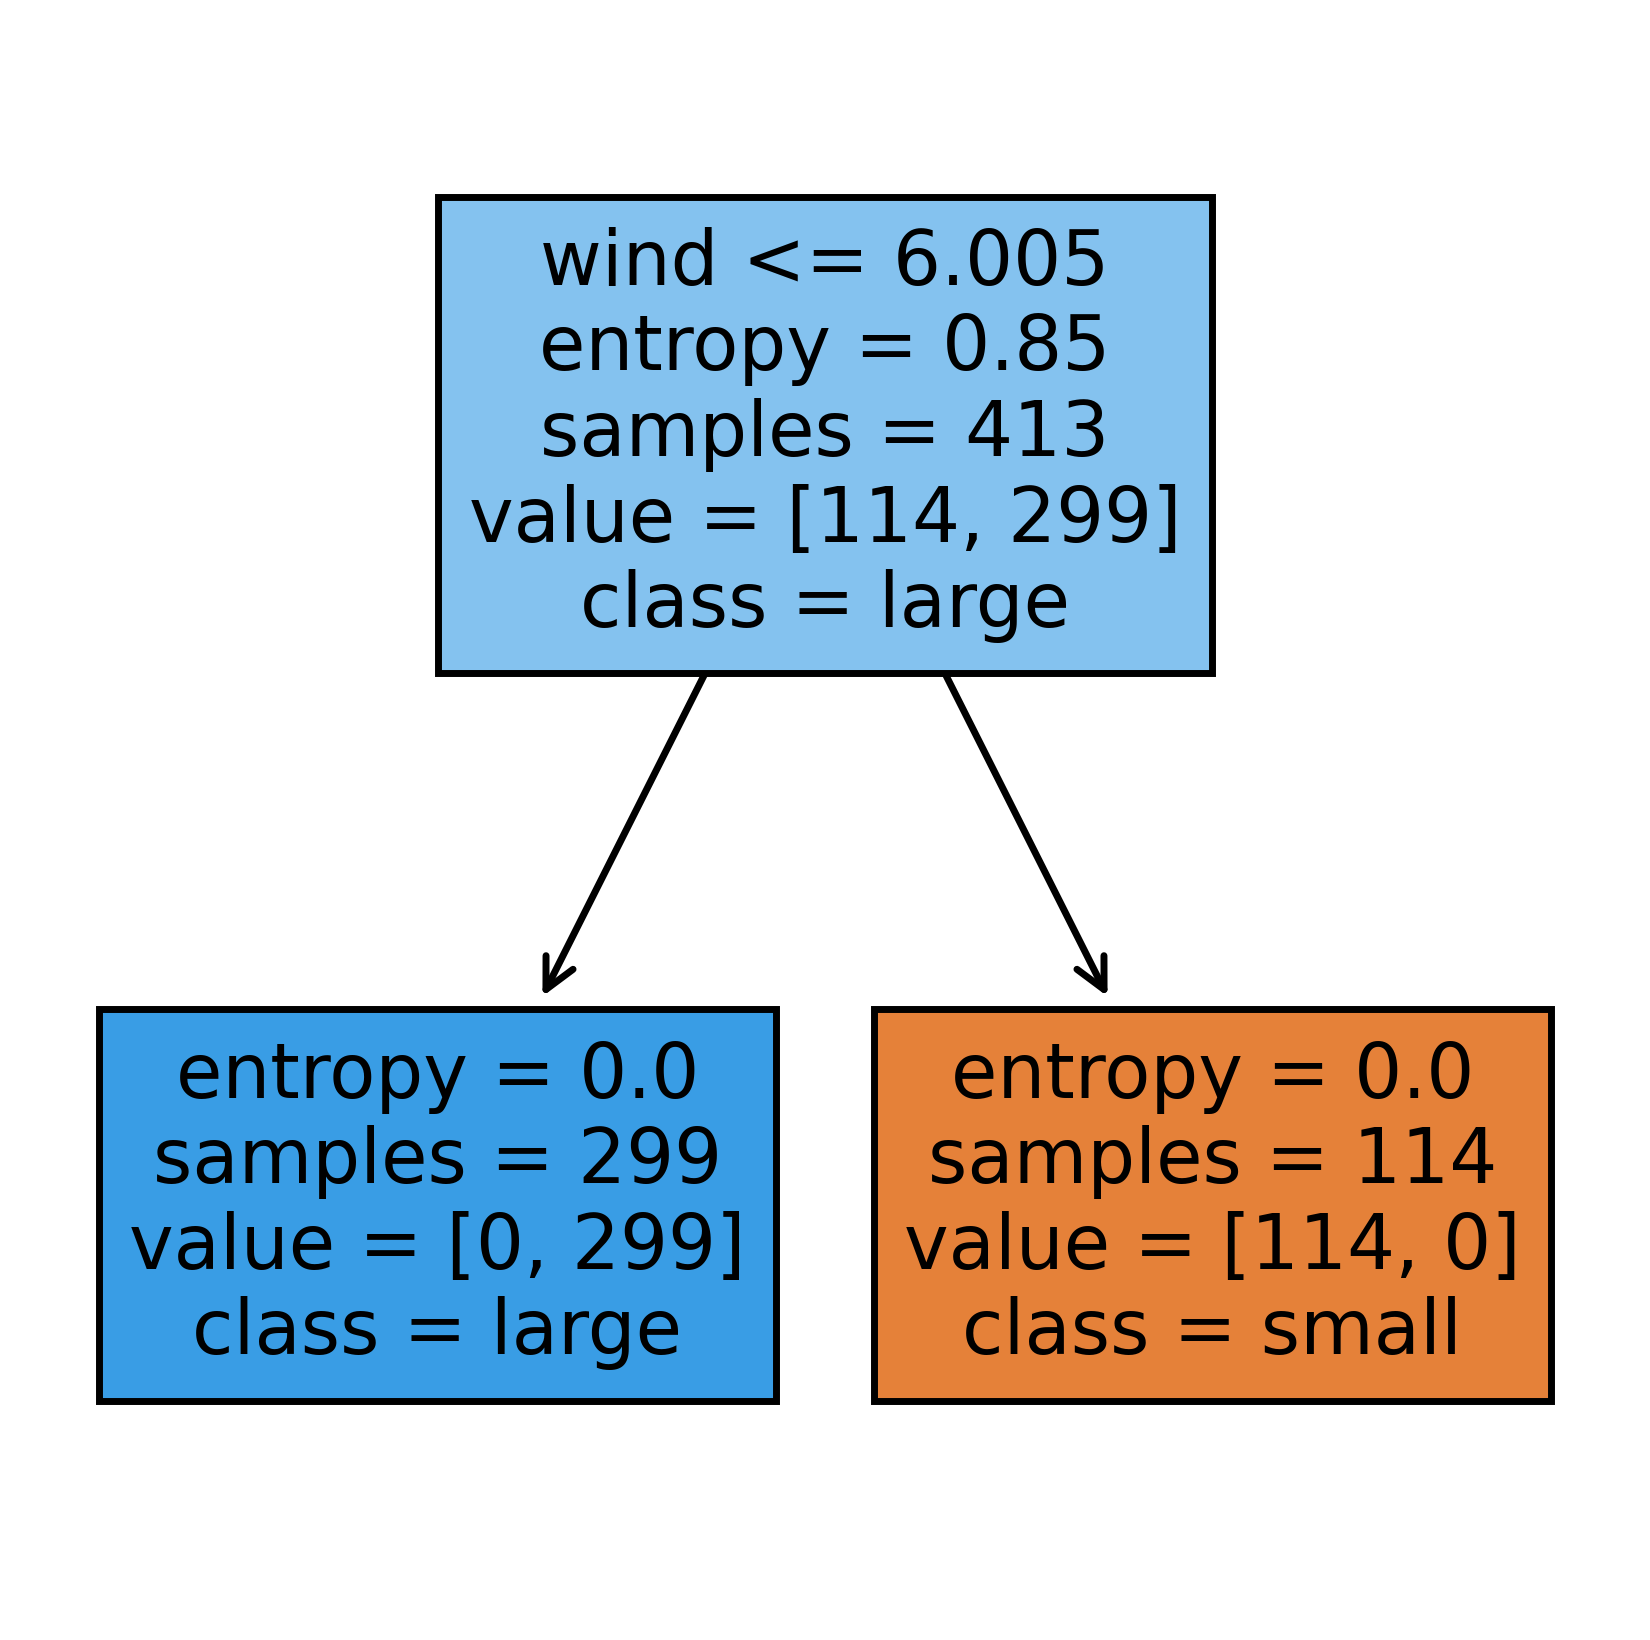

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree
col = ['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area']
cn = ['small', 'large']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [73]:
# Predicting on test data
preds = model.predict(x_test)   # Predicting on test data set
pd.Series(preds).value_counts()   #Getting the count of each category

1    79
0    25
dtype: int64

In [74]:
y_test.value_counts()

1    79
0    25
Name: size_category, dtype: int64

In [75]:
preds

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [76]:
pd.crosstab(y_test, preds)  # Getting the 2 way table to understand the correct and wrong predictions. 

col_0,0,1
size_category,,
0,25,0
1,0,79


In [77]:
preds, y_test

(array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]),
 429    1
 48     1
 321    0
 332    0
 380    0
       ..
 335    1
 82     1
 18     1
 169    1
 507    1
 Name: size_category, Length: 104, dtype: int32)

In [78]:
#Accuracy
from sklearn.metrics import accuracy_score
import numpy as np

np.mean(preds == y_test), accuracy_score(y_test, preds)

(1.0, 1.0)

# Building Decision Tree Classifier (CART) using Gini Criteria

In [79]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [80]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [81]:
# Prediction and Computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

1.0

# Decision Tree Regression Example

In [82]:
# Decision tree Regression
from sklearn.tree import DecisionTreeRegressor

In [83]:
array = ffire.values
X = array[:,:-1]
Y = array[:,-1]
print(X)
print(Y)

[[ 7.    0.   86.2  ...  6.7   0.    0.  ]
 [10.    5.   90.6  ...  0.9   0.    0.  ]
 [10.    2.   90.6  ...  1.3   0.    0.  ]
 ...
 [ 1.    3.   81.6  ...  6.7   0.   11.16]
 [ 1.    2.   94.4  ...  4.    0.    0.  ]
 [ 9.    5.   79.5  ...  4.5   0.    0.  ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1.

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [85]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [86]:
# Find The Accuracy
model.score(X_test, Y_test)

1.0

# ---------------------------------------------------------------------------------------------------------------

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
import pickle

In [88]:
## we already Divided dataset into input and output(I.e. model building is done)
# model fitting
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\ADMIN\anaconda3\envs\Envorinment_Name\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [90]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
y_pred = classifier.predict(X)

In [91]:
y_pred_ffire = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [92]:
y_pred_ffire

,actual,predicted_prob
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
512,0.0,0.0
513,0.0,0.0
514,0.0,0.0
515,1.0,1.0


In [93]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y, y_pred)
print(confusion_matrix)

[[138   1]
 [  0 378]]


In [94]:
((138+378)/(138+1+0+378))*100

99.80657640232108

In [95]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       139
         1.0       1.00      1.00      1.00       378

    accuracy                           1.00       517
   macro avg       1.00      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517



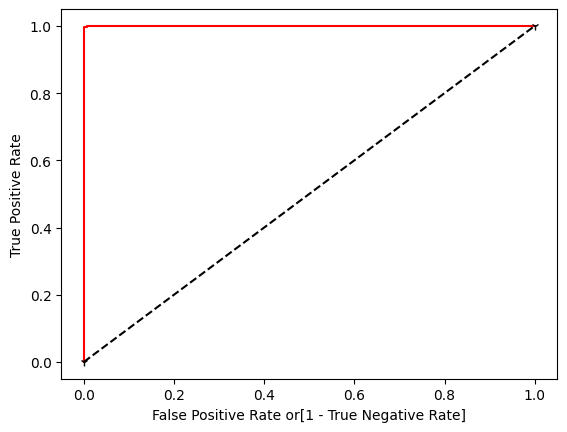

In [96]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or[1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [97]:
auc*100   # Accuracy

99.64028776978418

# ---------------------------------------------------------------------------------------------------------------

# KNN Classification

In [98]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [99]:
kfold = KFold(n_splits = 10)

In [100]:
model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results)
print("Accuracy is: ", results.mean()*100)

[0.98076923 0.98076923 0.98076923 0.5        0.63461538 0.69230769
 0.78846154 0.64705882 0.7254902  0.70588235]
Accuracy is:  76.36123680241327


In [101]:
# Grid Search for algorithm tuning
from sklearn.model_selection import GridSearchCV
import numpy as np
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [102]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [103]:
print(grid.best_score_)

0.7620799103808813


# ---------------------------------------------------------------------------------------------------------------

# SVC

In [104]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [105]:
# Take a sample of data set for training and testing.
array = ffire.values
X = array[:,2:-1]
Y = array[:,-1]
print(X)
print(Y)

[[ 86.2   26.2   94.3  ...   6.7    0.     0.  ]
 [ 90.6   35.4  669.1  ...   0.9    0.     0.  ]
 [ 90.6   43.7  686.9  ...   1.3    0.     0.  ]
 ...
 [ 81.6   56.7  665.6  ...   6.7    0.    11.16]
 [ 94.4  146.   614.7  ...   4.     0.     0.  ]
 [ 79.5    3.   106.7  ...   4.5    0.     0.  ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [106]:
ffire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(3), int64(1)
memory usage: 42.5 KB


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Creating training and test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [108]:
# Training a SVM classifier using SVC class
svm = SVC(kernel = 'linear', random_state = 1, C = 0.1)
svm.fit(X_train_std, Y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [109]:
# Mode performance
y_pred = svm.predict(X_test_std)
print("Accuracy: %.3f" % accuracy_score(Y_test, y_pred))

Accuracy: 0.788


# Accuracy is very small so we predict model using SVM.
# SVM

In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [112]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((413, 9), (104, 9), (413,), (104,))

 1) Grid Search CV

In [113]:
SVMC = SVC(random_state = 42)
svc_param_grid = {'kernel' : ['rbf', 'sigmoid', 'poly', 'linear'], 'gamma': [1,0.1,0.01,0.001], 'C': [1000,100,10,1], 'tol': [0.001,0.0008,0.0009,0.0011]}
gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 10, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train, Y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


0.9861861861861861

In [114]:
# Or 2) Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C': [10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 30)
gsv.fit(X_train, Y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.973 total time=   0.3s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

[CV 5/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 6/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 6/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 7/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 7/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 8/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 8/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 9/10; 7/24] START C=0.1, gamma=0.5, kernel=linear...........................
[CV 9/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 10/10; 7/24] START C=0.1, gamma=0.5, kernel=linear..........................
[CV 10/10; 7/24] END C=0.1, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 1/10; 8/24] START C=0.1, gamma=0.5, kernel=rbf..............................
[CV

[CV 4/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 5/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=0.917 total time=   0.0s
[CV 6/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 6/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=0.944 total time=   0.0s
[CV 7/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 7/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=1.000 total time=   0.0s
[CV 8/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 8/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=0.972 total time=   0.0s
[CV 9/10; 13/24] START C=0.001, gamma=0.5, kernel=linear........................
[CV 9/10; 13/24] END C=0.001, gamma=0.5, kernel=linear;, score=0.917 total time=   0.0s
[CV 10/10; 13/24] START C=0.001, gamma=0.5, kernel=linear..........

[CV 3/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 4/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf..........................
[CV 4/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf..........................
[CV 5/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 6/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf..........................
[CV 6/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 7/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf..........................
[CV 7/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 8/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf..........................
[CV 8/10; 20/24] END C=0.0001, gamma=0.5, kernel=rbf;, score=0.750 total time=   0.0s
[CV 9/10; 20/24] START C=0.0001, gamma=0.5, kernel=rbf.........................

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=30)

In [115]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'linear'}, 0.9861861861861861)

In [116]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(Y_test, y_pred)

Accuracy is:  99.35897435897436


array([[ 45,   1],
       [  0, 110]], dtype=int64)

In [117]:
((45+110)/(45+0+1+110))*100

99.35897435897436